# Kalman Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from optical_flow.ipynb import position

# Exercise 2c

It's now time to look at the more general equations of the Kalman filter. We would like to apply a Kalman filter for a robot moving in 1D. We would like to track and predict its position and its velocity. 

A quick summary of the variables:

**x** : The state matrix. Holds the state of the robot, which is its position and velocity.

**P** : The uncertainty of the state.

**u** : The external motion. In this case there will not be an external motion affecting the robot.

**F** : The transition matrix (or next state function). Used to predict the next state of the robot.

**H** : The observation matrix (or measurement function). Used to update the robot state.

**R** : The measurement uncertainty. 

**I** : Identity matrix.

You will now have to implement your own update and predict function using the formulas given here. All the matrices are given in the code below. 

When you multiply matrices together you can use [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html). To get the inverse of a matrix, you can use [np.linalg.pinv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html). To get the transpose you can use [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

The two equations written in black are the equations used for prediction and the rest are the equations used for updating.

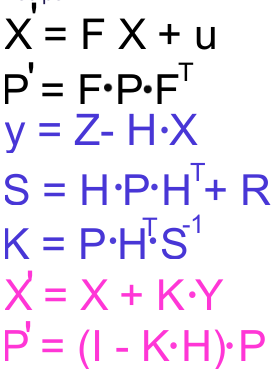

In [2]:
p=[[1018, 322],[1017, 322], [1014, 323],[1012, 324],[1010, 324]]

1017


In [6]:
# The initial state. The robot starts in position 0 with the velocity 0.
x = np.array([[p[0][0]], # Position along the x-axis
              [0]])# Velocity along the x-axis
y = np.array([[p[0][1]], # Velocity along the y-axis
              [0]])# Velocity along the y-axis

# The initial uncertainty. We start with some very large values.
P_x = np.array([[1000, 0],
              [0, 1000]])
P_y = np.array([[1000, 0],
              [0, 1000]])

# The external motion. Set to 0 here.
u = np.array([[0],
              [0]])

# The transition matrix. 
F = np.array([[1, 1],
              [0, 1]])

# The observation matrix. We only get the position as measurement.
H = np.array([[1, 0]])

# The measurement uncertainty
R = 1

# The identity matrix. Simply a matrix with 1 in the diagonal and 0 elsewhere.
I = np.array([[1, 0],
              [0, 1]])

# You can use the following measurements or come up with your own. 
measurements_x = [p[0][0], p[1][0], p[2][0], p[3][0], p[4][0]]
measurements_y = [p[0][1], p[1][1], p[2][1], p[3][1], p[4][1]]


def update(x, P, Z, H, R):
    # Insert update function
    Y = Z-H@x
    S = H@P@np.transpose(H) + R
    K = P@np.transpose(H)@np.linalg.pinv(S)
    x = x+K@Y
    P = (I-K@H)@P
    
    return [x,P]
    
def predict(x, P, F, u):
    ### insert predict function
    x = F@x + u
    P = F@P@np.transpose(F)
    
    return [x,P]
    
### Loop through the measurements ###
for i in range(0,len(measurements_x)):
    [x,P_x] = update(x, P_x, measurements_x[i], H, R)
    [x,P_x] = predict(x, P_x, F, u)
    [y,P_y] = update(y, P_y, measurements_y[i], H, R)
    [y,P_y] = predict(y, P_y, F, u)    
    
    print(x,y)
    
p=[[1018, 322],[1017, 322], [1014, 323],[1012, 324],[1010, 324]]

[[1018.]
 [   0.]] [[322.]
 [  0.]]
[[ 1.01600299e+03]
 [-9.98004987e-01]] [[322.]
 [  0.]]
[[1012.33555354]
 [  -1.99883455]] [[323.33272281]
 [  0.49966703]]
[[1010.00124928]
 [  -2.09946038]] [[324.49950032]
 [  0.69977017]]
[[1007.90078965]
 [  -2.09971016]] [[324.79974013]
 [  0.59990006]]


In [ ]:
#to do:
#occlusion area?
#hand
#change object
#video friendly
#bounding box
#clean it 